In [4]:
pip install gradio

In [5]:
import gradio as gr

In [6]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [7]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


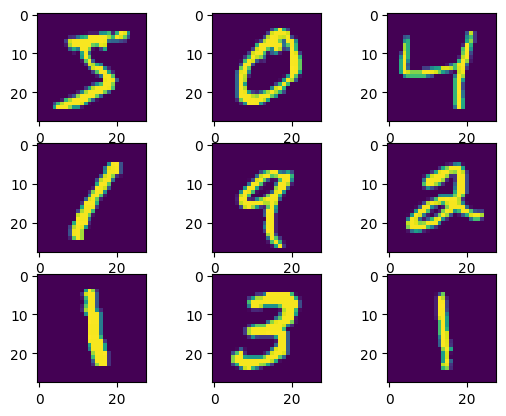

In [8]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [9]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [10]:
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)),
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'),
                                    Dense(10, activation=tf.nn.softmax)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8938 - loss: 0.3549
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9690 - loss: 0.0992
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9804 - loss: 0.0631
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9857 - loss: 0.0464
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9881 - loss: 0.0363
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9903 - loss: 0.0293
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9914 - loss: 0.0265
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9926 - loss: 0.0225
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9926 - loss: 0.0225
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9942 - loss: 0.0185


In [13]:
test=test_images[0].reshape(-1,28,28)
pred=model.predict(test)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
[[7.6313887e-20 2.8150507e-16 7.3599640e-16 4.0230629e-16 5.2058211e-13
  2.9449822e-19 7.6220124e-22 1.0000000e+00 2.4433512e-17 5.4710220e-10]]


In [15]:
import numpy as np
import gradio as gr
from PIL import Image
import cv2

def predict_image(img):
    try:
        # Check if the input is a PIL Image
        if isinstance(img, Image.Image):
            # Convert to NumPy array
            img = np.array(img)
        elif isinstance(img, np.ndarray):
            # Ensure it's a NumPy array
            img = img.astype('float32') / 255.0
        else:
            return "No image provided."

        # Check if the image is empty
        if img.size == 0:
            return "No image provided."

        # Resize the image to (28, 28)
        img = cv2.resize(img, (28, 28))  # Resize to 28x28

        # Check if the image is grayscale; if not, convert it
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if it's not

        # Normalize the pixel values
        img = img.astype('float32') / 255.0  # Normalize the pixel values

        # Print the shape of the image for debugging
        print(f"Image shape before reshaping: {img.shape}")

        # Reshape the image for the model
        img_reshaped = img.reshape(1, 28, 28, 1)  # Reshape to (1, 28, 28, 1)

        # Print the shape of the reshaped image for debugging
        print(f"Reshaped image shape: {img_reshaped.shape}")

        # Make a prediction
        prediction = model.predict(img_reshaped)
        return str(np.argmax(prediction))  # Get the class with the highest probability

    except Exception as e:
        return str(e)



In [16]:
iface = gr.Interface(fn=predict_image, inputs=gr.Sketchpad(), outputs="label")

# Launch the interface
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://46251e90e156cb3e37.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
